# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 7

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 15 баллов
* Задача 3 &mdash; 20 баллов
* Задача 4 &mdash; 30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):

* Задача 5 &mdash; 30 баллов
* Задача 6 &mdash; 20 баллов




-----

In [ ]:
# Bot check

# HW_ID: phds_hw7
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(font_scale=1.3, palette='Set2')

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'

%matplotlib inline

# Теоретическая часть

### <b><font color="blue">Легкая часть</font></b>

## Задача 1

В условиях задач 2, 3 и 6 из предыдущего домашнего задания постройте асимптотические доверительные интервалы, которые можно использовать на практике (в формулах не должно быть $\theta$).

**Задача 2**

$X_1,...,X_n$ выборка из из распределения $\mathcal{N}(\theta, \sigma^2)$
Рассмотри $\widehat{\theta} = \overline{X}$ - *асимптотически нормальную оценку* для $\theta$ c $\sigma^2(\theta)=\sigma^2$

Из ЦПТ следует, что $\sqrt{n}\ \left(\overline{X}-\theta \right)\ \rightarrow^{d}\ \mathcal{N}(0, \sigma^2)$

Из предыдущего дз: $S^2$ - состоятельная оценка $\sigma^2$

Тогда: $\theta\ \in\ \left( \overline{X} \pm \frac{z_{1+\frac{\alpha}{2}}}{\sqrt{n}}S \right)$ - АДИ для нашей оценки

**Задача 3**

Пусть $X_1,...,X_n$ выборка из из распределения $U(0, \theta)$. Как было показано в предыдущем ДЗ, $\widehat{\theta} = \overline{2X} = \frac 2n \sum\limits_{i=1}^nX_i $ - несмешенная оценка $\mathbb E X\ =\ \frac{\theta}{2}$. Тогда аналогично из ЦПТ: $\sqrt{n}\ \left(\overline{X}-\frac{\theta}{2} \right)\ \rightarrow^{d}\ \mathcal{N}(0, \sigma^2)$
Теперь оценим $\sigma^2$. Для начала псочитаем 2 момент и воспользуемся определением $\mathbb D X$:
$$
\mathbb E X^2 = \int\limits_{-\infty}^{+\infty}x^2\frac{I(x \in [0, \theta])}{\theta}dx = \int\limits_0^{\theta}x^2\frac{1}{\theta}dx = \frac{\theta^2}{3}
$$

Тогда, $\mathbb D X =\mathbb E X^2 - \left(\mathbb E X \right)^2\ = \frac{\theta^2}3 - \frac{\theta^2}4 = \frac{\theta^2}{12}$, а поскольку нам надо найти $\mathbb D 2X$, то, домножив на 4, получим: $\mathbb D 2X = \frac{\theta^2}{3}$. Таким образом, получаем, что $\sigma^2 = \frac{\theta^2}{3}$. То есть теперь нужно оценить $\frac{\theta}{\sqrt{3}}$. Эта величина является непрерывной от оцененной ранее величины функцией, следовательно можно оценить $\frac{\theta}{\sqrt{3}}$ как $\frac{2}{\sqrt{3}}\overline{X} = \frac 1{\sqrt{3}}\widehat{\theta}$

Тогда: $\theta\ \in\ \left( \widehat{\theta} \pm \frac{z_{\frac{1+\alpha}{2}}}{\sqrt{n}}\frac{\widehat{\theta}}{\sqrt{3}} \right)\ =\ 2\left( \overline{X} \pm \frac{z_{\frac{1+\alpha}{2}}}{\sqrt{n}}\frac{\overline{X}}{\sqrt{3}} \right)$ - АДИ для нашей оценки

**Задача 6**

$X\sim \mathcal{N}(\theta, \sigma^2)$. 

Рассмотрим случайную величину $X = \frac{(k-1)S^2}{\sigma^2}$. Эта случайная величина имеет распределение *хи-квадрат* $\chi^2(n, 0, 1)$, следовательно мы можем оценить квантили данного распределения и таким образом построить доверительный интервал для $\sigma^2$. То есть, если $z_\alpha$ - $\alpha$-ый квантиль распеделения хи-квадрат с k степннями свободы, то:
$$
\frac{(k-1)S^2}{\sigma^2} \in (z_{\frac{1-\alpha}{2}},\ z_{\frac{1+\alpha}{2}}),
$$
следовательно,
$$
\sigma^2 \in (\frac{(n-1)s^2}{z_{\frac{1+\alpha}{2}}}, \frac{(n-1)s^2}{z_{\frac{1-\alpha}{2}}})
$$АДИ для нашей оценки

# Практическая часть

### <b><font color="blue">Легкая часть</font></b>

## Задача 2

**1.** Загрузите с помощью `pandas` из файла `airquality.csv` данные о качестве воздуха в Нью-Йорке с мая по сентябрь 1973 года по дням. Данные содержат измерения нескольких величин, описания которых можно прочитать [по ссылке](https://www.rdocumentation.org/packages/datasets/versions/3.5.1/topics/airquality).

In [31]:
data = pd.read_csv('airquality.csv')
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


Выведите описательные статистики (метод `describe`) для всех признаков, для которых это имеет смысл.  Округлите до второго знака после запятой.

In [32]:
data.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


Что можно сказать о наличии в данных выбросов, сравнивая выборочную медиану и выборочное среднее?

**Ответ:** Значения медианы и среднего практически совпадают для признаков: `Temp`, `Month`, `Day` что говорит об отсутствии выбросов, либо о том, что они примерно симметричны относительно среднего значения. 

Для признаков `Ozone`, `Solar.R`, `Wind` значения медианы и среднего отличаются, однако это не позволяет сказать что-либо о наличии выбросов, так как причиной может служить несимметричная плотность распределения (полученная из какой-то непараметрической оценки, например KDE)

**2.** Теперь для каждого параметра постройте график ящиков с усами (`boxplot`), в котором ось `x` соответствует номеру месяца, а ось `y` — значениям параметра (т.е. свой ящик для каждого месяца). Используйте функцию `seaborn.boxplot`.

In [50]:
columns=data.drop(['Month', 'Day'], axis=1).columns
columns

Index(['Ozone', 'Solar.R', 'Wind', 'Temp'], dtype='object')

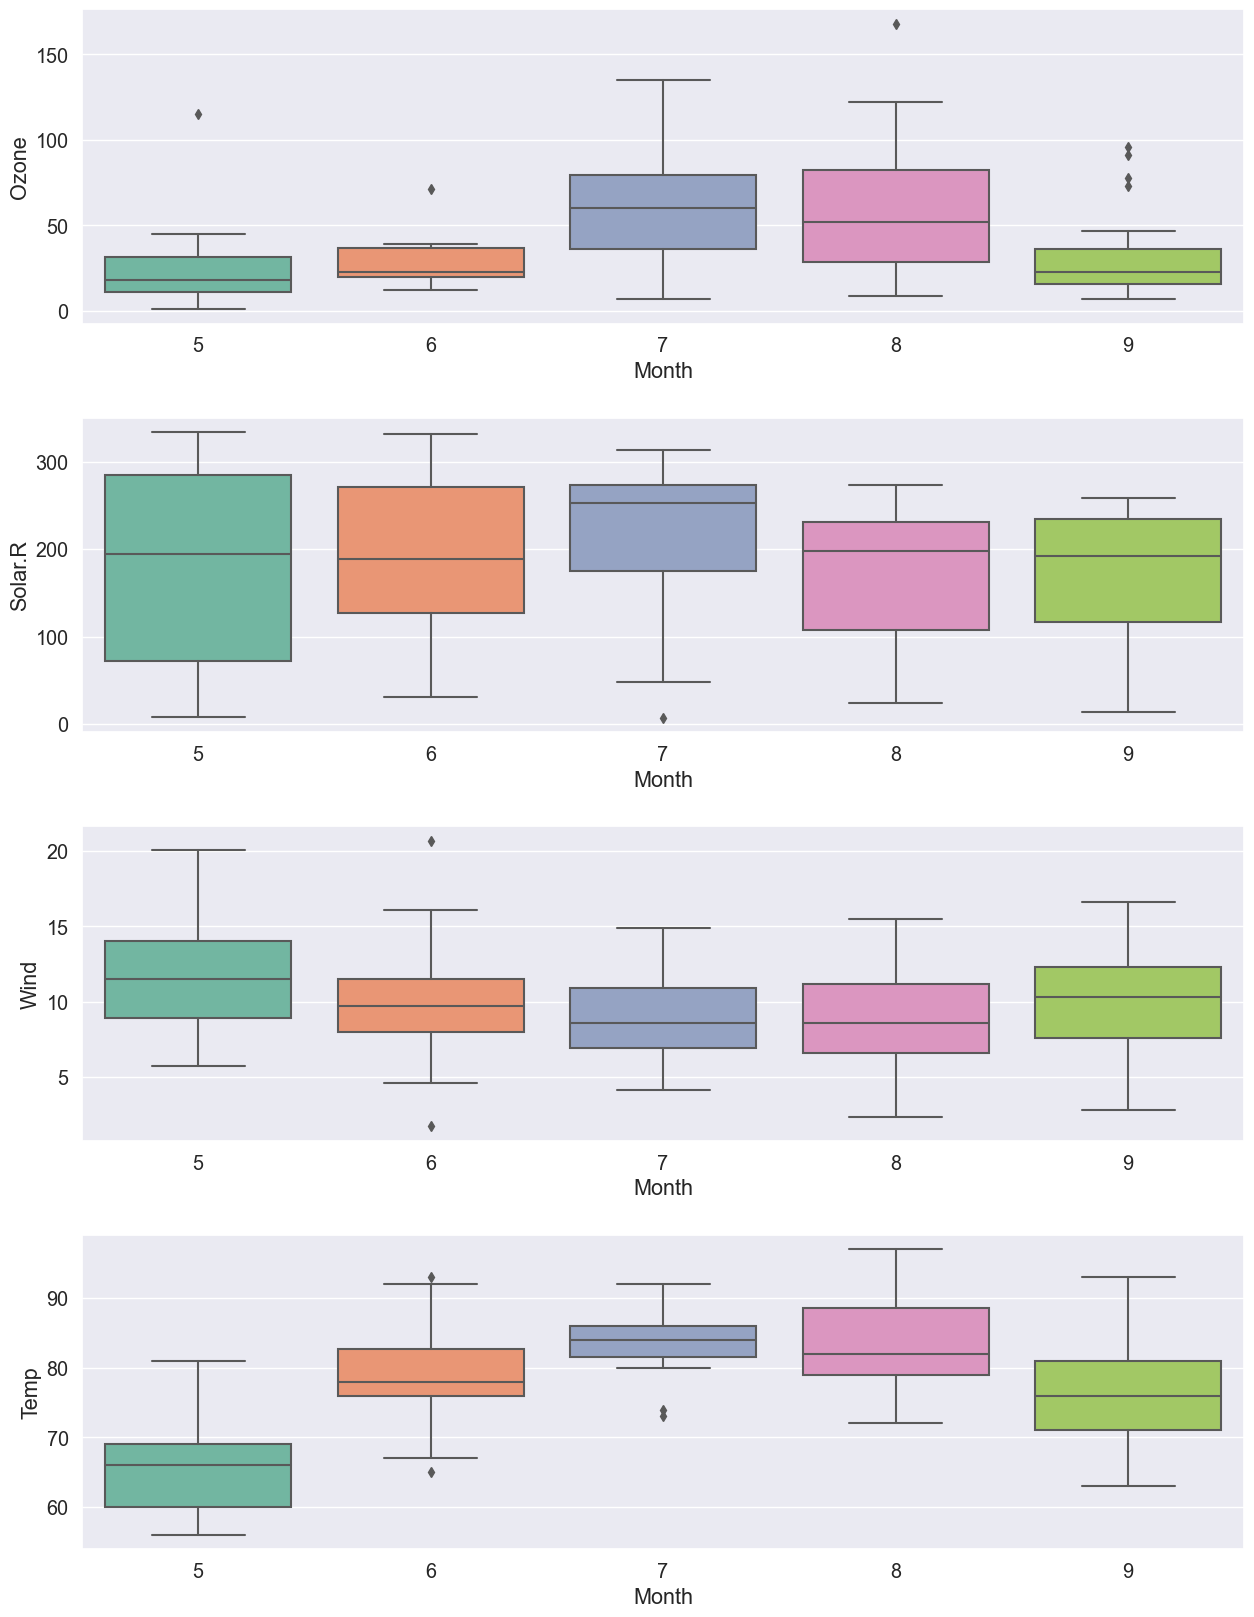

In [51]:
fig, axs = plt.subplots(nrows=len(columns))
fig.set_size_inches(15, 20)
for i, col in enumerate(columns):
    sns.boxplot(data=data, y=col, x='Month', ax=axs[i])

plt.subplots_adjust(hspace=0.3)

Опишите структуру `boxplot`. Какие выводы можно сделать в данном случае?

**Ответ:**
* *Для `Ozone`:*
Данные распределены не очень равномерно, во всех месяцах кроме одного присутствует ощутимое количество выбросов, которые видны благодаря графику `boxplot`. Теперь мы знаем причину отклонения значений среднего от медианы, всё дело в выбросах, относительно которых среднее значение неустойчиво.

- *Для `Solar.R`:*
В целом, данные распределены достаточно равномерно около своего медианного значения, ощутимые выбросы присутствуют только в одном из месяцев.

- *Для `Wind`:*
Аналогично `Solar.R`, данные распределены достаточно равномерно около своего медианного значения, ощутимые выбросы присутствуют только в одном из месяцев.

- *Для `Temp` :*
Присутствуют значительные выбросы, из-за чего данные распределены не очень равномерно

**3.** Для параметра с наибольшим числом наблюдений, признанных выбросами, посчитайте и сравните:
- выборочное среднее;
- выборочную медиану;

Посчитаем для признака `Ozone`:

In [54]:
median_value = np.nanquantile(data['Ozone'], 0.5)
mean_value = np.mean(data['Ozone'])
print(f'Медиана: {median_value} \nСреднее значение: {mean_value}')

Медиана: 31.5 
Среднее значение: 42.12931034482759


Какими свойствами статистик вызваны наблюдаемые различия?

**Ответ:** Как видно из `boxplot`-графика данный признак имеет наибольшую долю выбросов и именно здесь наблюдается наибольшее различие между медианным и выборочным средним значением. Исходя из этого можно сделать вывод о том, что влиянию выбросов выборочное среднее подвержено намного сильнее (о чём мы итак догадывались)

При подсчете этих статистик обычно предполагается, что наблюдения независимы. Выполнено ли это свойство в данном случае?

**Ответ:** Вероятнее всего не выполнено. Потому что на коротких временных диапазонах (порядка пары дней), по текущей погоде мы можем с той или иной точностью прелсказать погоду через пару дней. Это обусловленно конечной (и достаточно малой) скоростью изменения погоды, что делает наблюдения зависимыми.(Например, сейчас идёт ливень и +5, мы с большой уверенностью можем сказать, что через час будет идти дождь и будет $5\pm 2\  ^0C$)

А оно часто бывает выполнено? Как это можно проверить? Что бывает, когда оно нарушается? Какие есть количественные меры зависимости между признаками? Ответы на эти вопросы вы узнаете далее, но задуматься и порассуждать полезно уже сейчас.

**Ответ:** В реальности условие независимости не выполняется абсолютно никогда (по крайней мере если мы под реальностью подразумеваем изучение материальных объектов и их взаимодействий), это следует как минимум из ОТО Эйнштейна. 

Для оценки корелляции различных признаков, есть много различных приёмов, например, можно визуализировать на одном графике ЯОП для двух признаков и посчитать интеграл их перекрывания, а дальше провести эту процедуру попарно для всех признаков и получить таким образом некоторую матрицу, по смыслу совпадающую с матрицей ковариаций.

Сделайте выводы о полезности робастных статистик, методах визуального анализа и о наличии независимых одинаково распределённых случайных величин в реальном мире.



**Вывод:** Робастные статистики могут быть полезны, когда мы хотим непараметрически оценить распределение. Методы визуального анализа помогают увидеть некоторые свойства распределения, а также, что нам очень пригодилось, наличие **выбросов**. Независимых одинаково распределенных велечин в материальном мире не существует, это лишь некотрое идеализированное представление, которое позволяет с некоторой точностью объяснить наблюдаемые нами результаты.

## Задача 3

Постройте плотность стандартного **нормального распределения** и стандартного **распределения Коши**. Видим, что распределение Коши обладает более тяжелыми хвостами, нежели нормальное.

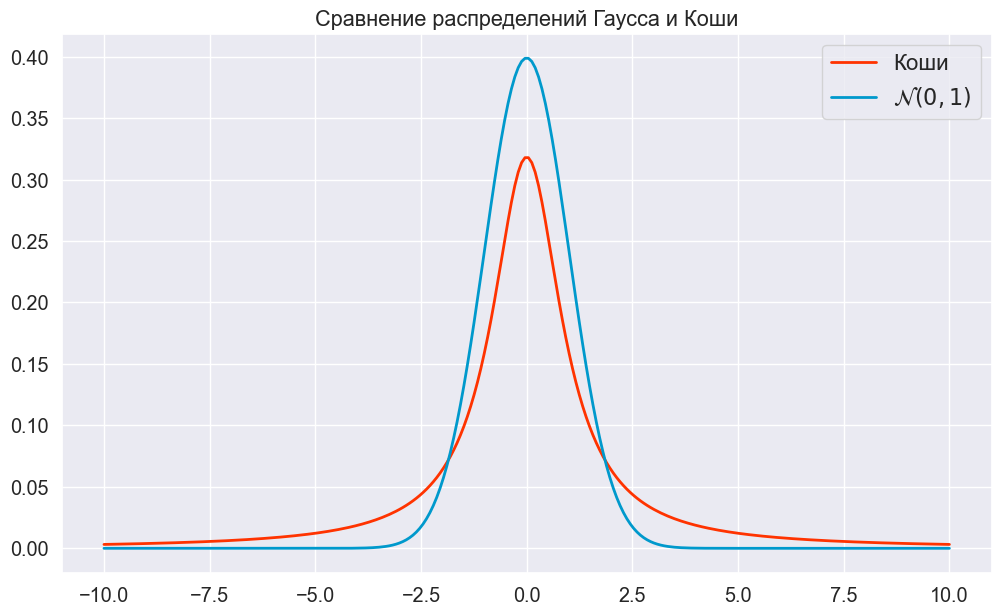

In [2]:
fig = plt.figure(figsize=(12,7))
grd=np.linspace(-10,10,250)
plt.title('Сравнение распределений Гаусса и Коши')
plt.plot(grd, sps.cauchy.pdf(grd), color=red, label='Коши', lw=2)
plt.plot(grd, sps.norm.pdf(grd), color=blue,
 label='$\mathcal{N}(0, 1)$', lw=2)
plt.legend(fontsize=16, loc='upper right')
plt.show()

Сгенерируйте $10^5$ выборок размера 30 из стандартного **нормального распределения**.

In [2]:
sample_size = 30  # размер выборок
sample_count = 10**5  # количество выборок
samples_norm=sps.norm.rvs(size=(sample_count, sample_size))
samples_norm.shape

(100000, 30)

По каждой выборке из 30 элементов посчитайте выборочные средние. Далее по ним постройте гистограмму и плотность стандартного нормального распределения. Какой вывод вы можете сделать из полученного графика?

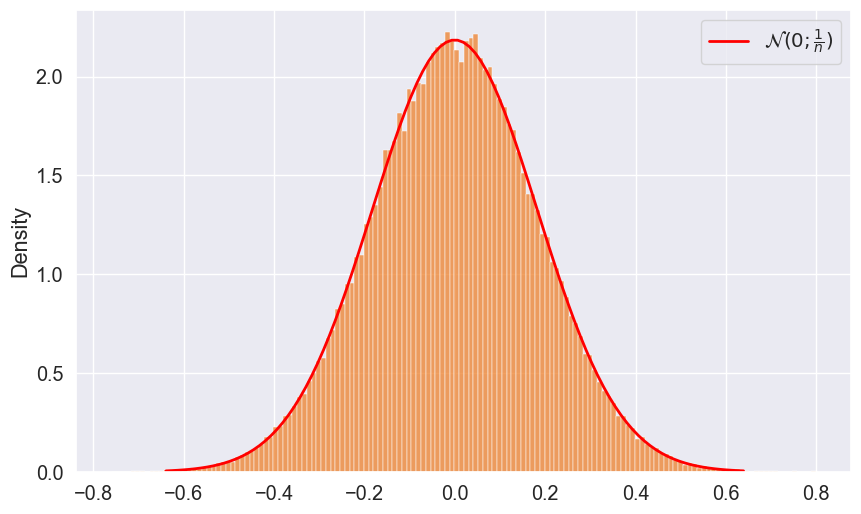

In [94]:
means = np.mean(samples_norm, axis=1)
plt.figure(figsize=(10,6))
sns.histplot(means, stat='density', color='#ED812C')
plt.plot(np.linspace(-3.5/np.sqrt(30), 3.5/np.sqrt(30), 100), 
         sps.norm.pdf(np.linspace(-3.5/np.sqrt(30), 3.5/np.sqrt(30), 100), scale=1/np.sqrt(30)), color='', 
         label=r'$\mathcal{N}(0; \frac{1}{n})$', lw=2)
plt.legend()
plt.show()

Истинная(в масштабе) плотность из ЦПТ:

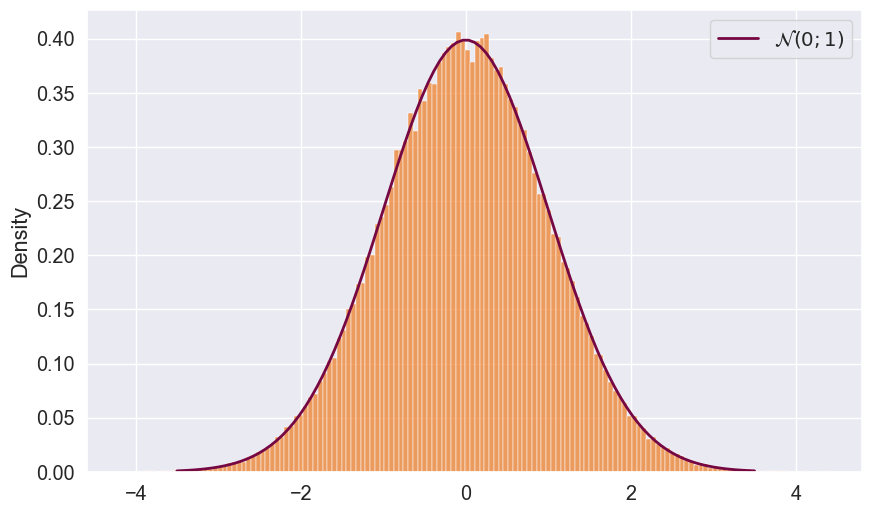

In [97]:
plt.figure(figsize=(10,6))
sns.histplot(means*np.sqrt(30), stat='density', color='#ED812C')
plt.plot(np.linspace(-3.5, 3.5, 100), 
         sps.norm.pdf(np.linspace(-3.5, 3.5, 100)), color='#750743', 
         label=r'$\mathcal{N}(0; 1)$', lw=2)
plt.legend()
plt.show()

**Вывод:** Для нормального распределения нет никаких аномалий (в отличие от примера ниже) с существованием матожидания, а значит работает ЦПТ из чего следует асимптотическая нормальность оценки параметра нашего распределения, и средние значения оказываются распределены нормально.
$$
\sqrt{n}\ \overline{X}_{N} \xrightarrow{d} \mathcal{N}(0, 1),\ N \to\infty
$$

Сгенерируем $10^5$ выборок размера 30 из стандартного **распределения Коши**.

In [8]:
samples_cauchy=sps.cauchy.rvs(size=(sample_count, sample_size))
samples_cauchy.shape

(100000, 30)

Построим аналогичный график.

(-10000.0, 10000.0)

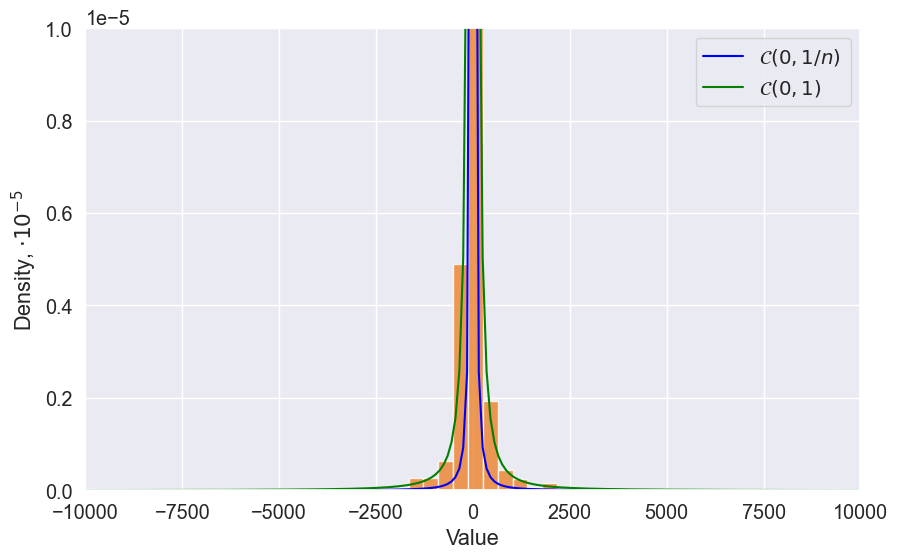

In [9]:
means_cauchy = np.mean(samples_cauchy, axis=1)
plt.figure(figsize=(10,6))
plt.hist(means_cauchy, density=True, bins=200, alpha=0.8, color='#ED812C')
grid = np.linspace(-10000,10000,200)
plt.plot(grid, sps.cauchy.pdf(grid, scale=1/np.sqrt(30)), color='#0000FF', label='$\mathcal{C}(0, 1/n)$ ')
plt.plot(grid, sps.cauchy.pdf(grid), color='green', label='$\mathcal{C}(0, 1) $')
plt.legend()
plt.ylim(0, 10**(-5))
plt.ylabel('Density, $\cdot 10^{-5}$')
plt.xlabel('Value')
plt.xlim(-10000,10000)

Сравните графики для нормального распределения и для Коши, опишите ваше сравнение в выводе по задаче.

**Вывод:** Средние значение для выборок размеры 30 распределены примерно также как и сами случайные велечины в распределении Коши. Из этого следует, что ЦПТ для распределения Коши не работает. То есть с увеличением размера выборки не появляется разных "крутых" свойств, таких как сходимость по рспределению, то есть предсказание свойств данного распределение не улучшается с ростом выборки. Основной причиной этому является отсутствие первого и всех последующих моментов, а значит к такому классу распределений неприменимы некоторые методы, например построение асимтотически нормального дверительного интервала.



## Задание 4


**Профиль Физика**

Скачайте <a target="_blank" href="https://www.kaggle.com/datasets/fedesoriano/cern-electron-collision-data">данные</a> столкновениях частиц и оставьте следующие признаки:
* `E1`, `E2` &mdash; полная энергия электронов (ГэВ);
* `M` &mdash; инвариантная масса двух электронов (ГэВ).

Датасет большой, поэтому для ускорения расчетов можно взять подвыборку размера ~ 1000 

**Профиль Биология**

Скачайте <a target="_blank" href="https://www.kaggle.com/datasets/ruslankl/mice-protein-expression">данные</a> экспрессии белков у белых мышей и оставьте следующие белки для анализа:
* `ITSN1_N`
* `DYRK1A_N`
* `ELK_N`




**1.** Постройте для каждого из них гистограммы. Что можно сказать о характере распределения?


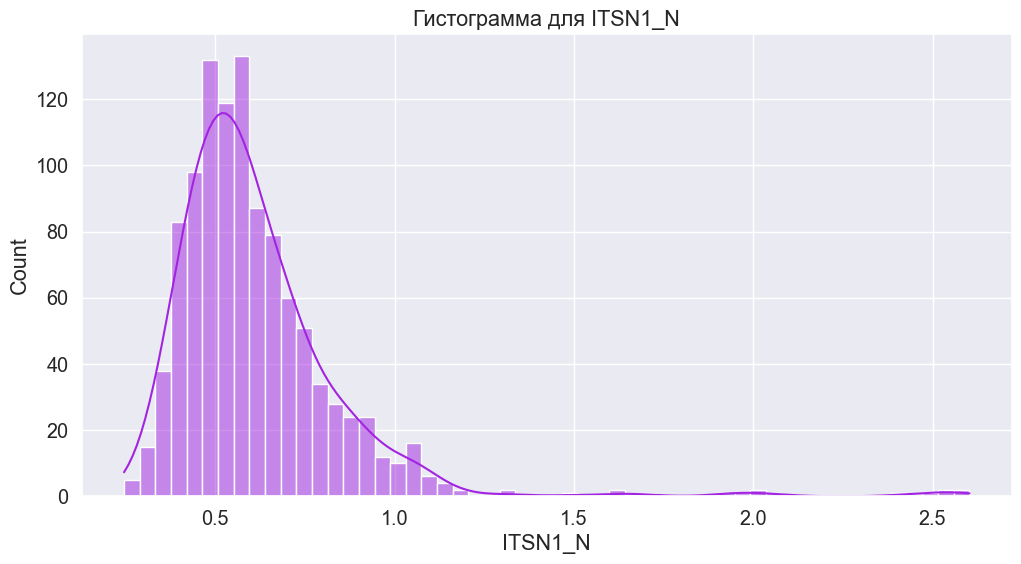

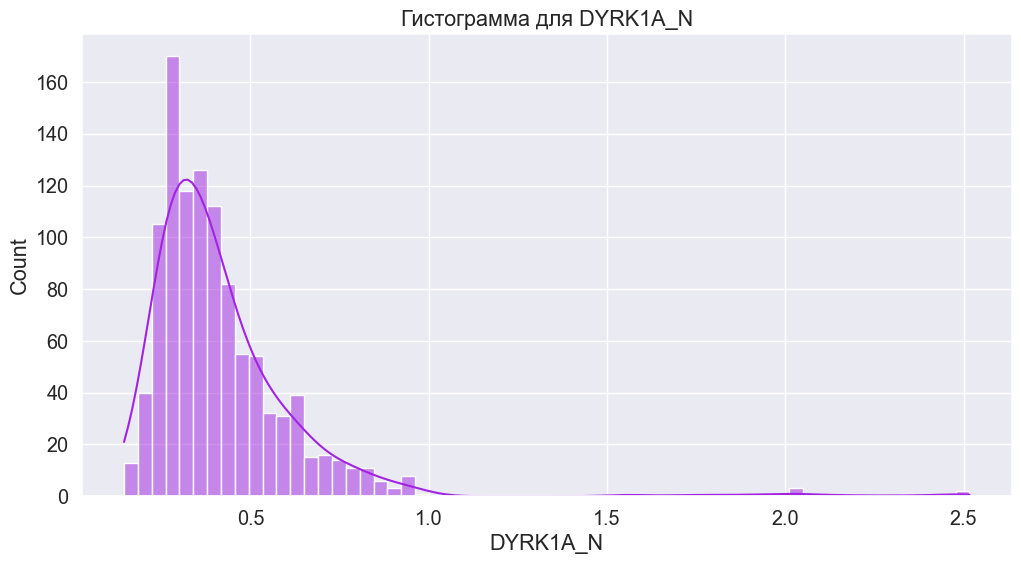

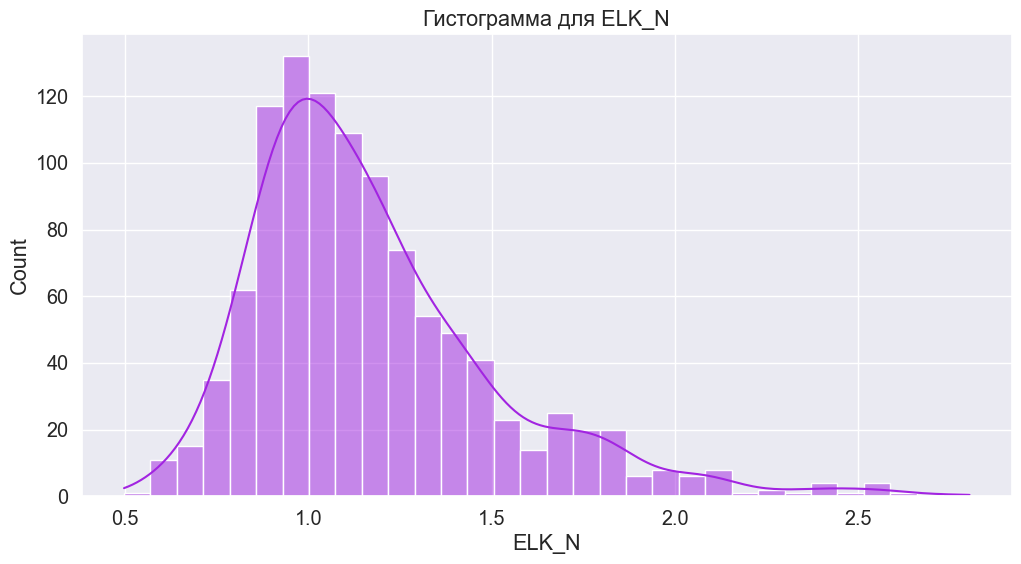

In [12]:
df = pd.read_csv("Data_Cortex_Nuclear2.csv")
df_corr=df[['ITSN1_N', 'DYRK1A_N', 'ELK_N']]
columns=df_corr.columns
for column in columns:
    plt.figure(figsize=(12,6))
    plt.title(f'Гистограмма для {column}')
    sns.histplot(df_corr[column], kde=True, line_kws={'color': 'red'}, color='#A224E1')
    

**Ответ:** Распределения для данных признаков имеют много выбросов справа от максимума, если исключить выбросы из рассмотрения, то полученные распределения окажутся похожими на нормальное. 

**2.** Пусть есть выборка $X_1, ..., X_n$. Опишите процедуру бутстрепа построения доверительного интервала для величины $\theta = \mathsf{E} X_1$. Рассмотрите три типа  бутстрепных доверительных интервалов.
Выпишите соответствующие формулы. 

**Описание**:


**3.** Реализуйте функцию вычисления выборки оценок $\theta^*_1, \ldots \theta^*_B$ для оценки $\widehat \theta$ методом бутстрепа. Функция должна принимать на вход выборку и количество бутстрепных выборок $B$. 

Для ускорения расчетов можете использовать broadcasting (не является обязательным требованием). Учите, что в таком случае внутри функции у вас могут получиться очень большие матрицы, из-за которых может кончиться оперативная память. 

In [62]:
def bootstrap(sample, B=100_000): 
    '''
    Считает бутстрепные оценки для исходной выборки

    :param sample: исходная выборка
    :param B: количество бутстрепных 
    :return bootstrap_estimations: оценки по бутстрепным выборкам
    '''   
    
    n = len(sample)
    return np.random.choice(a=sample, size=(B, n)).mean(axis=1)

**4.** Реализуйте три типа бутстрепных доверительных интервалов в виде функций, принимающих на вход выборку оценок, полученных с помощью бутстрепа. Реализовывать вычисление бутстрепных интервалов для подвыборок размера от 1 до n не нужно, только для всей выборки. 

In [50]:
def bootstrap_normal_confidence_interval(theta, bootstrap_estimations, alpha=0.95):
    '''
    Считает левую и правую границу нормального бутстрепного интервала

    :param theta: оценка параметра
    :param bootstrap_estimations: массив бутстрепных оценок
    :return left: левая граница бутстрепного интервала
    :return right: правая граница бутстрепного интервала
    '''   

    sigma = np.sqrt(np.var(bootstrap_estimations)) 
    z_a = sps.norm.ppf((1+alpha)/2)
    left = theta - z_a*sigma
    right = theta + z_a*sigma
    return np.array([left,right])

    
def bootstrap_central_confidence_interval(theta, bootstrap_estimations, alpha=0.95):
    '''
    Считает левую и правую границу центрального бутстрепного интервала

    :param theta: оценка параметра
    :param bootstrap_estimations: массив бутстрепных оценок
    :return left: левая граница бутстрепного интервала
    :return right: правая граница бутстрепного интервала
    '''   

    left = 2*theta-np.nanquantile(bootstrap_estimations, 1/2*(1+alpha)) 
    right = 2*theta-np.nanquantile(bootstrap_estimations, 1/2*(1-alpha))
    return np.array([left,right])

    
def bootstrap_quantile_confidence_interval(theta, bootstrap_estimations, alpha=0.95):
    '''
    Считает левую и правую границу квантильного бутстрепного интервала

    :param theta: оценка параметра
    :param bootstrap_estimations: массив бутстрепных оценок
    :return left: левая граница бутстрепного интервала
    :return right: правая граница бутстрепного интервала
    '''   
    left = np.quantile(bootstrap_estimations, (1-alpha)/2)
    right = np.quantile(bootstrap_estimations, (1+alpha)/2)
    return np.array([left,right])

**5.** Для каждого признака постройте бутстрепные доверительные интервалы для $\theta = \mathsf{E} X_1$ и сравните их.

In [51]:
dt = pd.DataFrame(index = ['normal', 'central', 'quantile', 'theta', 'interval_length'], columns=df_corr.columns)
dt

,ITSN1_N,DYRK1A_N,ELK_N
normal,NaN,NaN,NaN
central,NaN,NaN,NaN
quantile,NaN,NaN,NaN
theta,NaN,NaN,NaN
interval_length,NaN,NaN,NaN


In [53]:
dic={'normal': 'bootstrap_normal_confidence_interval', 
     'central': 'bootstrap_central_confidence_interval',
    'quantile': 'bootstrap_quantile_confidence_interval'}

In [56]:
for column in columns:
    for ind in ['normal', 'central', 'quantile']:
        try:
            dt[ind][column] = dic[ind](df_corr[column].mean(), bootstrap(df_corr[column]))
            
        except:
            if ind=='theta':
                dt[ind][column] = df[column].mean()
            elif ind=='interval_length':
                dt[ind][column] = np.array([dat[column].iloc[i].length for i in range(3)])
        

In [57]:
dt

,ITSN1_N,DYRK1A_N,ELK_N
normal,NaN,NaN,NaN
central,NaN,NaN,NaN
quantile,NaN,NaN,NaN
theta,NaN,NaN,NaN
interval_length,NaN,NaN,NaN


**Вывод:** 

Визуализируйте бутстрепные интервалы для каждого признака. Для этого сгенерируйте выборку $X_1, ... X_{N}, N = 100$ и постройте график доверительных интервалов уровня доверия $0.95$, вычисленных для всех подвыборок размера $n$ вида $X_1, ... X_n$, $1 \le n \le 100$, используя написанную ниже функцию

In [38]:
def draw_confidence_interval(
    left,
    right,
    estimation=None,
    sample=None, 
    ylim=(None, None), 
    estim_label = '',
    sample_label='',
    color=None,
    interval_label=None
):
    '''
    Рисует доверительный интервал и оценку в зависимости от размера выборки.
    
    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param estim_label: подпись к оценке
    :param sample_label: подпись к выборке
    :param color: цвет, которым будет отображен доверительный интервал
    '''
    
    return
    

**Решение:**

**Вывод:** 

### <b><font color="orange">Сложная часть</font></b>

## Задача 5


Предлагается изучить некоторые свойства распределения Коши с параметром сдвига $\theta$, обладающего плотностью распределения $p_{\theta}(x) = \frac{1}{\pi \left(1 + \left(x- \theta\right)^2\right)}$.

На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения,
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Тогда $X_i, i=1,...,n$ — зарегистрированные координаты точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости — образуют выборку из распределения Коши со сдвигом $\theta$.

**1.** На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду. Сделайте выводы о сходствах и различиях распределений

**Решение:**

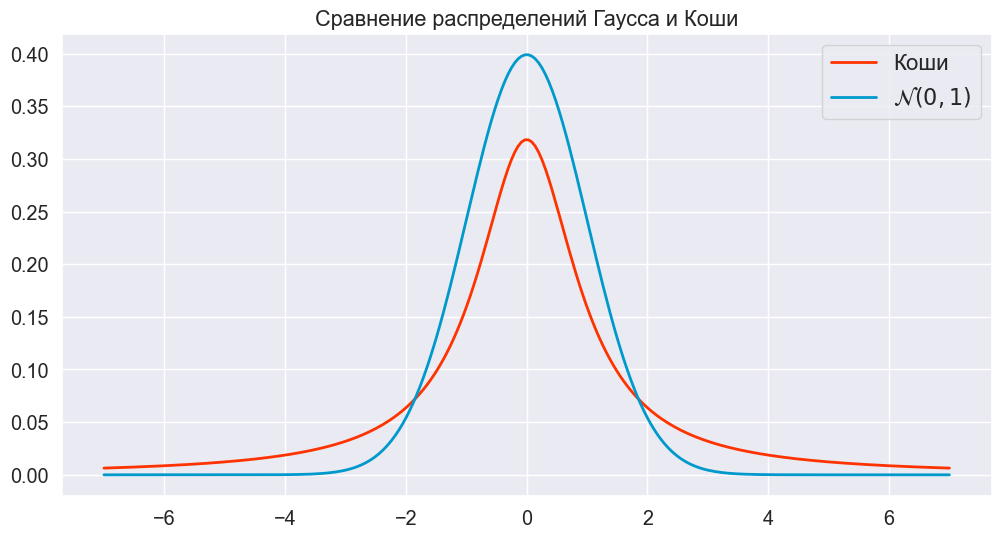

In [26]:
fig = plt.figure(figsize=(12,6))
grd=np.linspace(-7,7,250)
plt.title('Сравнение распределений Гаусса и Коши')
plt.plot(grd, sps.cauchy.pdf(grd), color=red, label='Коши', lw=2)
plt.plot(grd, sps.norm.pdf(grd), color=blue,
 label='$\mathcal{N}(0, 1)$', lw=2)
plt.legend(fontsize=16, loc='upper right')
plt.show()

**Вывод:** Оба стандартные распределения являются симметричными относительно $x=0$. При этом видно что у распределения Коши, как уже было замечено ранее более "тяжёлые хвосты". На практике это означает, что при попытке посчитать матожидание для распределения Коши на интервале $x \in (-\infty; +\infty)$ нас ждёт разочарование, т.к. искомый интеграл Лебега расходится: 
$$
\mathbb E \left[\theta \right]\ =\ \int\limits_{-\infty}^{+\infty}xp_{\theta}(x)dx\ \notin \mathbb R
$$
И чего также следует несуществование всех последующих моментов для распределения Коши.

**2.** Чему равна асимптотическая дисперсия $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, для распределения Коши? Помочь в ее вычислении может теорема, упомянутая на лекциях. Посчитайте асимптотическую дисперсию аналитически. Постройте график зависимости асимптотической дисперсии $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, от $\alpha$.

Настройте видимую область графика по оси *y* так, чтобы четко была отображена информативная часть графика. Отметьте на графике минимум функции.

**Решение:**

При каком значении $\alpha$ асимптотическая дисперсия $\sigma^2_{\alpha}$ минимальна и чему она равна? Ответ можно найти численно.

**Ответ:** 

**3.** Сгенерируйте выборку $X = \left(X_1, \dots, X_{1000} \right)$ из стандартного распределения Коши. Для всех $n \leqslant 1000$ по первым $n$ элементам выборки $X_1, \dots, X_n$ вычислите значения следующих оценок:
- $\overline{X}$  —  выборочное среднее;
- $\overline{X}_{\alpha}$ —  усеченное среднее, где $\alpha$ &mdash; значение, на котором достигается минимум $\sigma^2_{\alpha}$;
- $\widehat{\mu}$ —  выборочная медиана;

На графиках изобразите зависимость значений **всех оценок** от $n$ для одной реализации выборки, а на другом графики траекторий по нескольким реализациям.

Постройте также график, на котором изобразите значения MSE для каждой оценки от размера выборки $n$.

*Указание:* $MSE_{\widehat{\theta}}(\theta) = (\widehat{\theta} - \theta)^2$. В качестве $\theta$ возьмите истинное значение для стандартного распределения Коши. Для подсчета усеченного среднего можно использовать функцию `scipy.stats.trim_mean`.

Сравните асимптотические дисперсии оценок. Сделайте вывод.

**Решение:**

**Вывод:** 

## Задача 6
Асимпотические доверительные интервалы ничего не могут гарантировать на малых размерах выборки.
В этой задаче вам предстоит иллюстрировать этот факт, посчитав реальный уровень доверия для интервалов.

**Реальный уровень доверия (оценка доли покрытия интервалом)**  - доля случаев попадания истинного значения параметра в доверительный интервал.

*Пример:* вы проводите 100 экспериментов (создаете 100 выборок), для каждой выборки рассчитываете АДИ для параметра $\theta$. Истинный параметр попадает в 93 интервала из 100, значит реальный уровень доверия в этом случае будет 0.93.

**Важно:** при такой оценке реального уровня доверия вы используете метод Монте-Карло. Погрешность этого метода составляет $\sim \frac{1}{\sqrt{n}}$, где $n$ - количество выборок, по которым осуществляется оценка. 

*Вопрос:* какое $n$ нужно брать, если вы хотите оценить реальный уровень доверия с точностью до 2 знаков ($\delta = 0.01$)? 

**Ответ:**


Сгенерируйте набор выборок из нормального распределения $\mathcal{N}(\theta, 1)$ при $\theta=0$

In [ ]:
theta = 0  # истинное значение параметра
sample_size = 300
sample_count = <...>
X = <...>

Рассмотрим $\hat{\theta} = \overline{X}$.

Напоминание из теории:
$$\hat{\theta} - \frac{z_{\frac{1+\alpha}{2}}\hat{\sigma}}{\sqrt{n}} < \theta < \hat{\theta} + \frac{z_{\frac{1+\alpha}{2}}\hat{\sigma}}{\sqrt{n}}$$

Посчитайте $z$ (используйте функцию `.ppf`)

Постройте график зависимости реального уровня доверия от размера выборки.

Сделайте выводы.

**Вывод:** 